<a href="https://colab.research.google.com/github/Davron030901/OpenCv/blob/main/31_OCR_with_PyTesseract_and_EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optical Character Recognition with PyTesseract & EASY OCR**

- In this lesson we'll implement OCR on a few images using PyTesseract

![](https://miro.medium.com/max/1400/1*X7RfC5wOZ-Gsoo95Ez1FvQ.png)
Source - https://medium.com/@balaajip/optical-character-recognition-99aba2dad314

#### **Install PyTesseract on Colab**

In [ ]:
# Install PyTesseract and setup on Colab
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,593 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Our First OCR Trial**

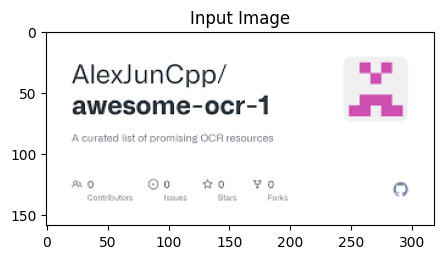

PyTesseract Extracted: AlexJunCpp/ La
awesome-ocr-1 L



In [ ]:
img = cv2.imread('OCR1.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

## **Does white text on blackgrounds work?**

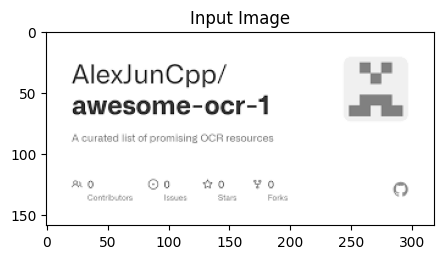

PyTesseract Extracted: AlexJunCpp/
awesome-ocr-1

  

 



In [ ]:
img = cv2.imread('OCR1.png',0)
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

## **What about more messy backgrounds?**

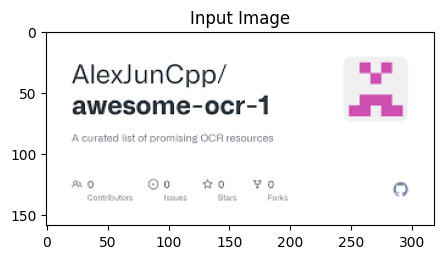

PyTesseract Extracted: AlexJunCpp/ La
awesome-ocr-1 L



In [ ]:
img = cv2.imread('OCR1.png',3)
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

## **What about a real life scan?**

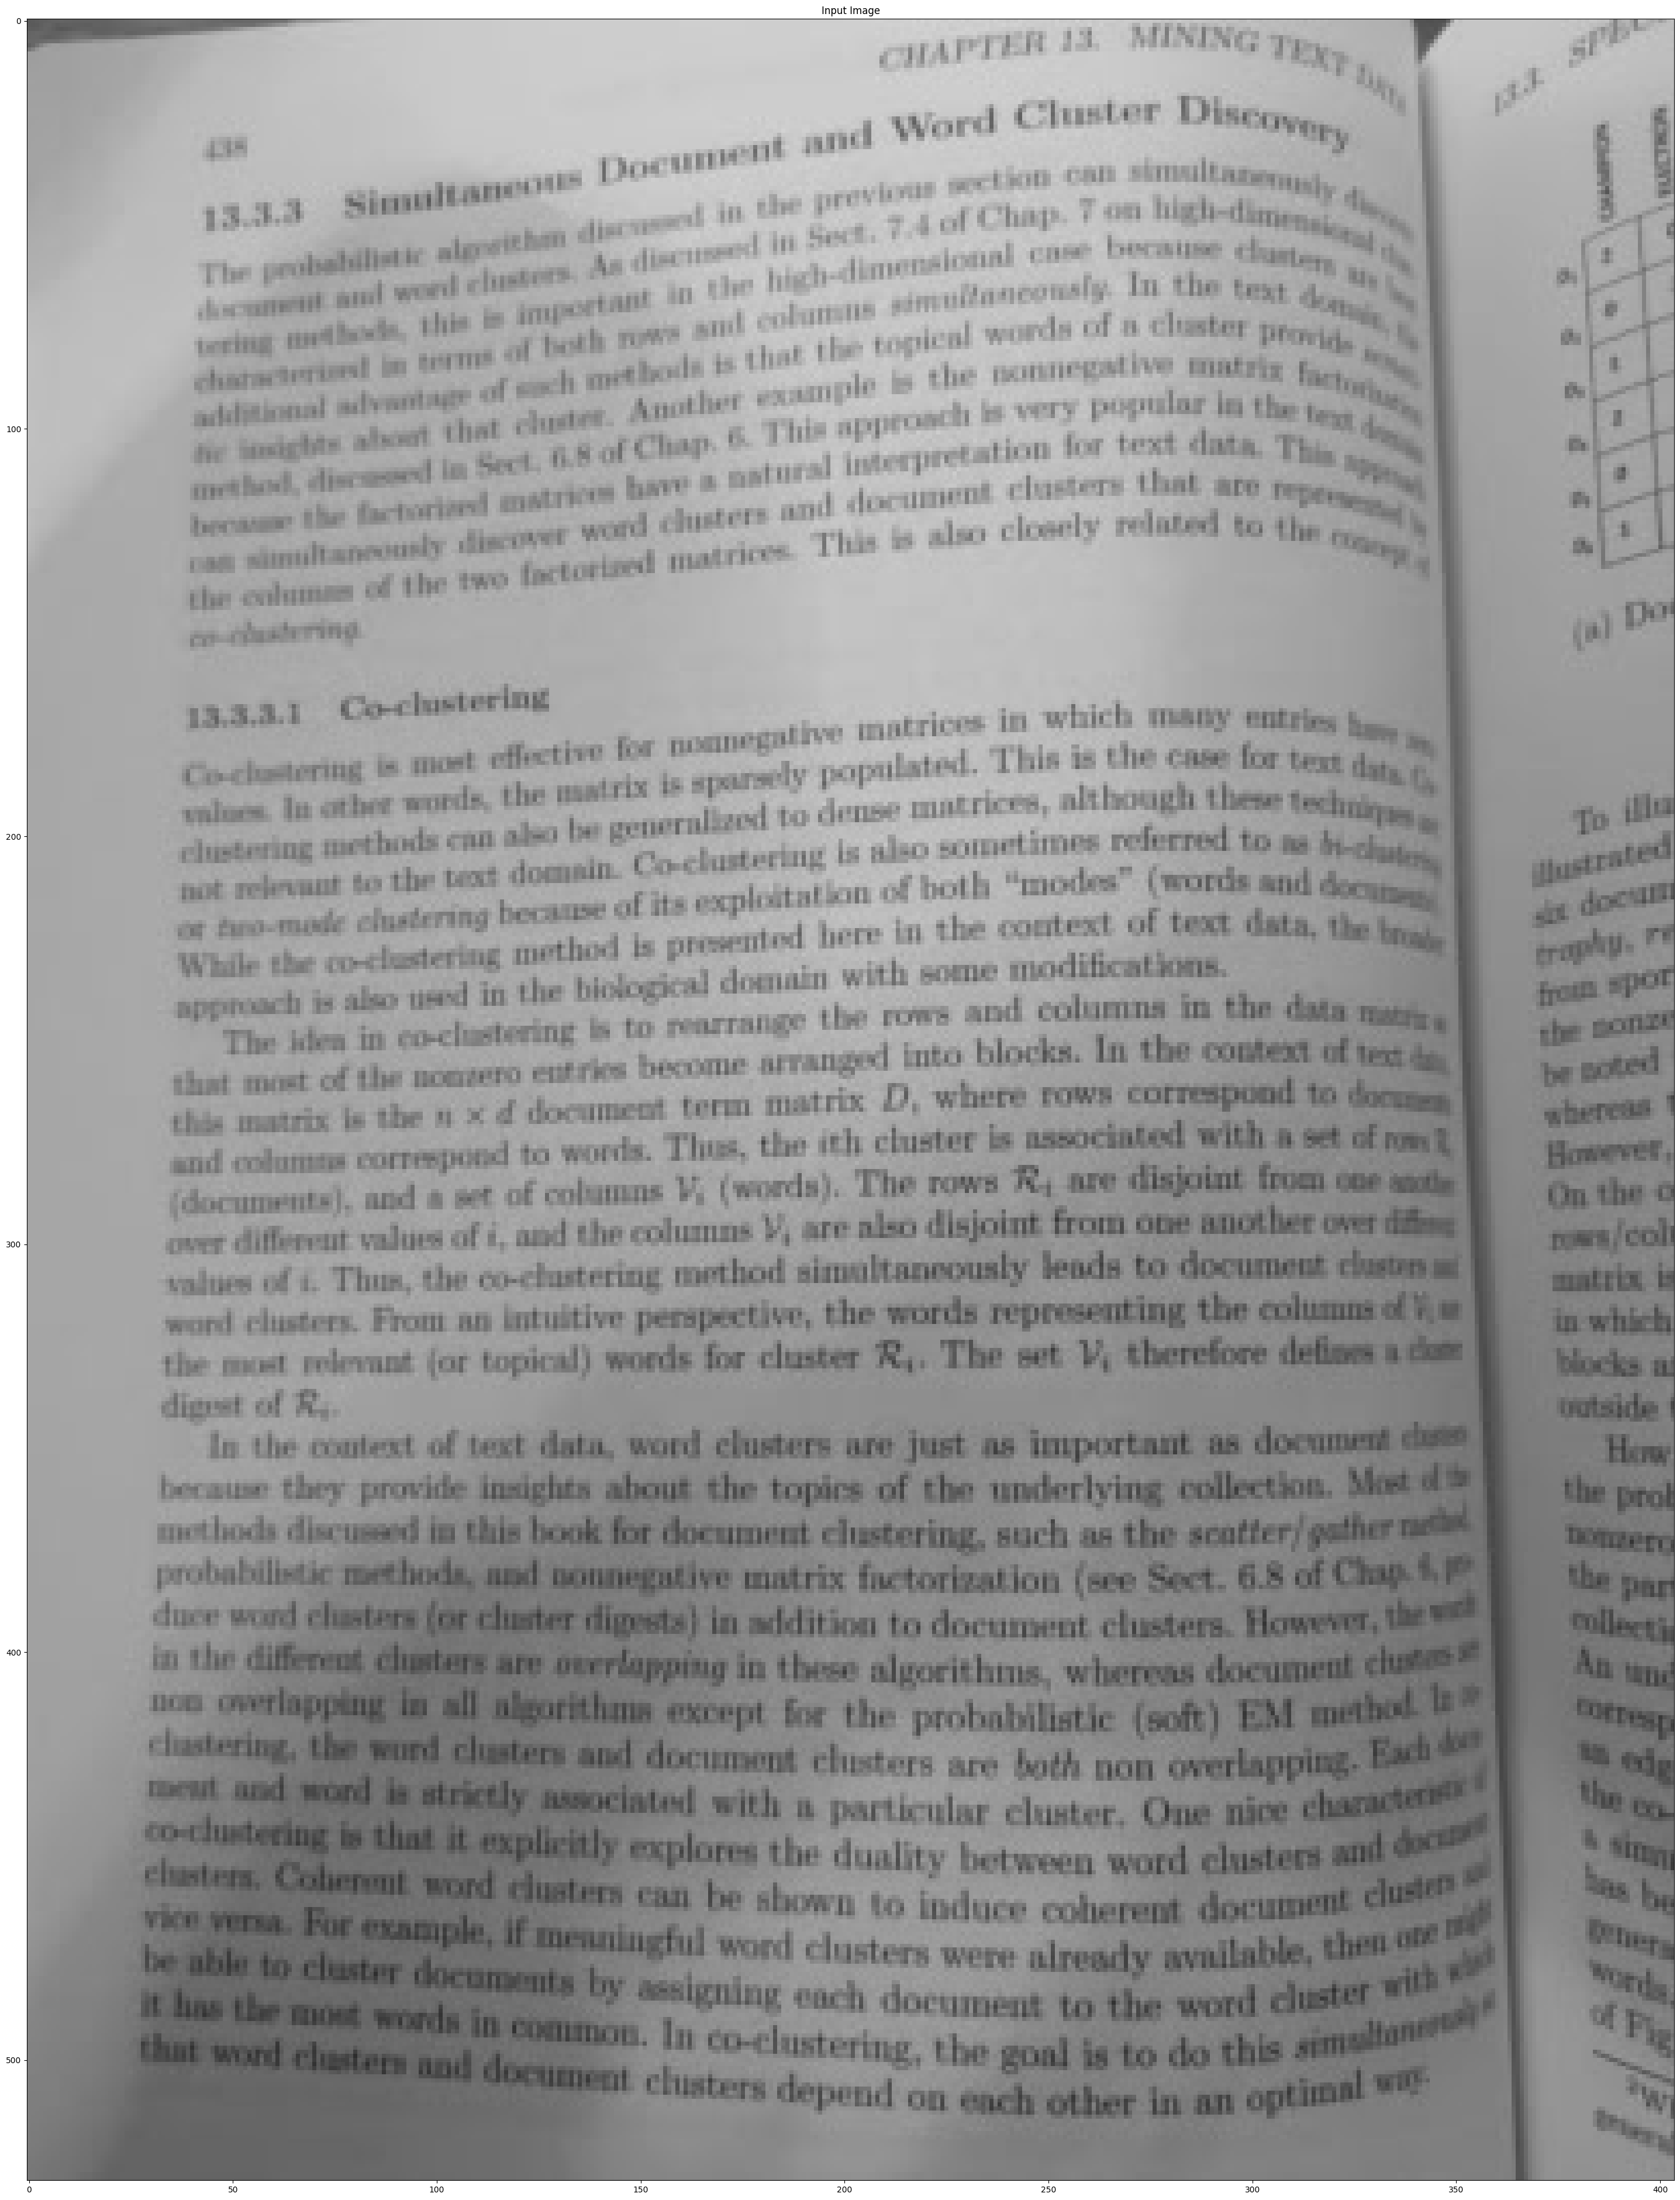

PyTesseract Extracted: 4 Cluster Disco
Word nil

a
:
a

etd Ths Ue a
ra one, th
iu srw ere a

 



In [ ]:
img = cv2.imread('scan.jpeg')
imshow("Input Image", img, size = 48)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

# **We Need To Clean Up Our Images**

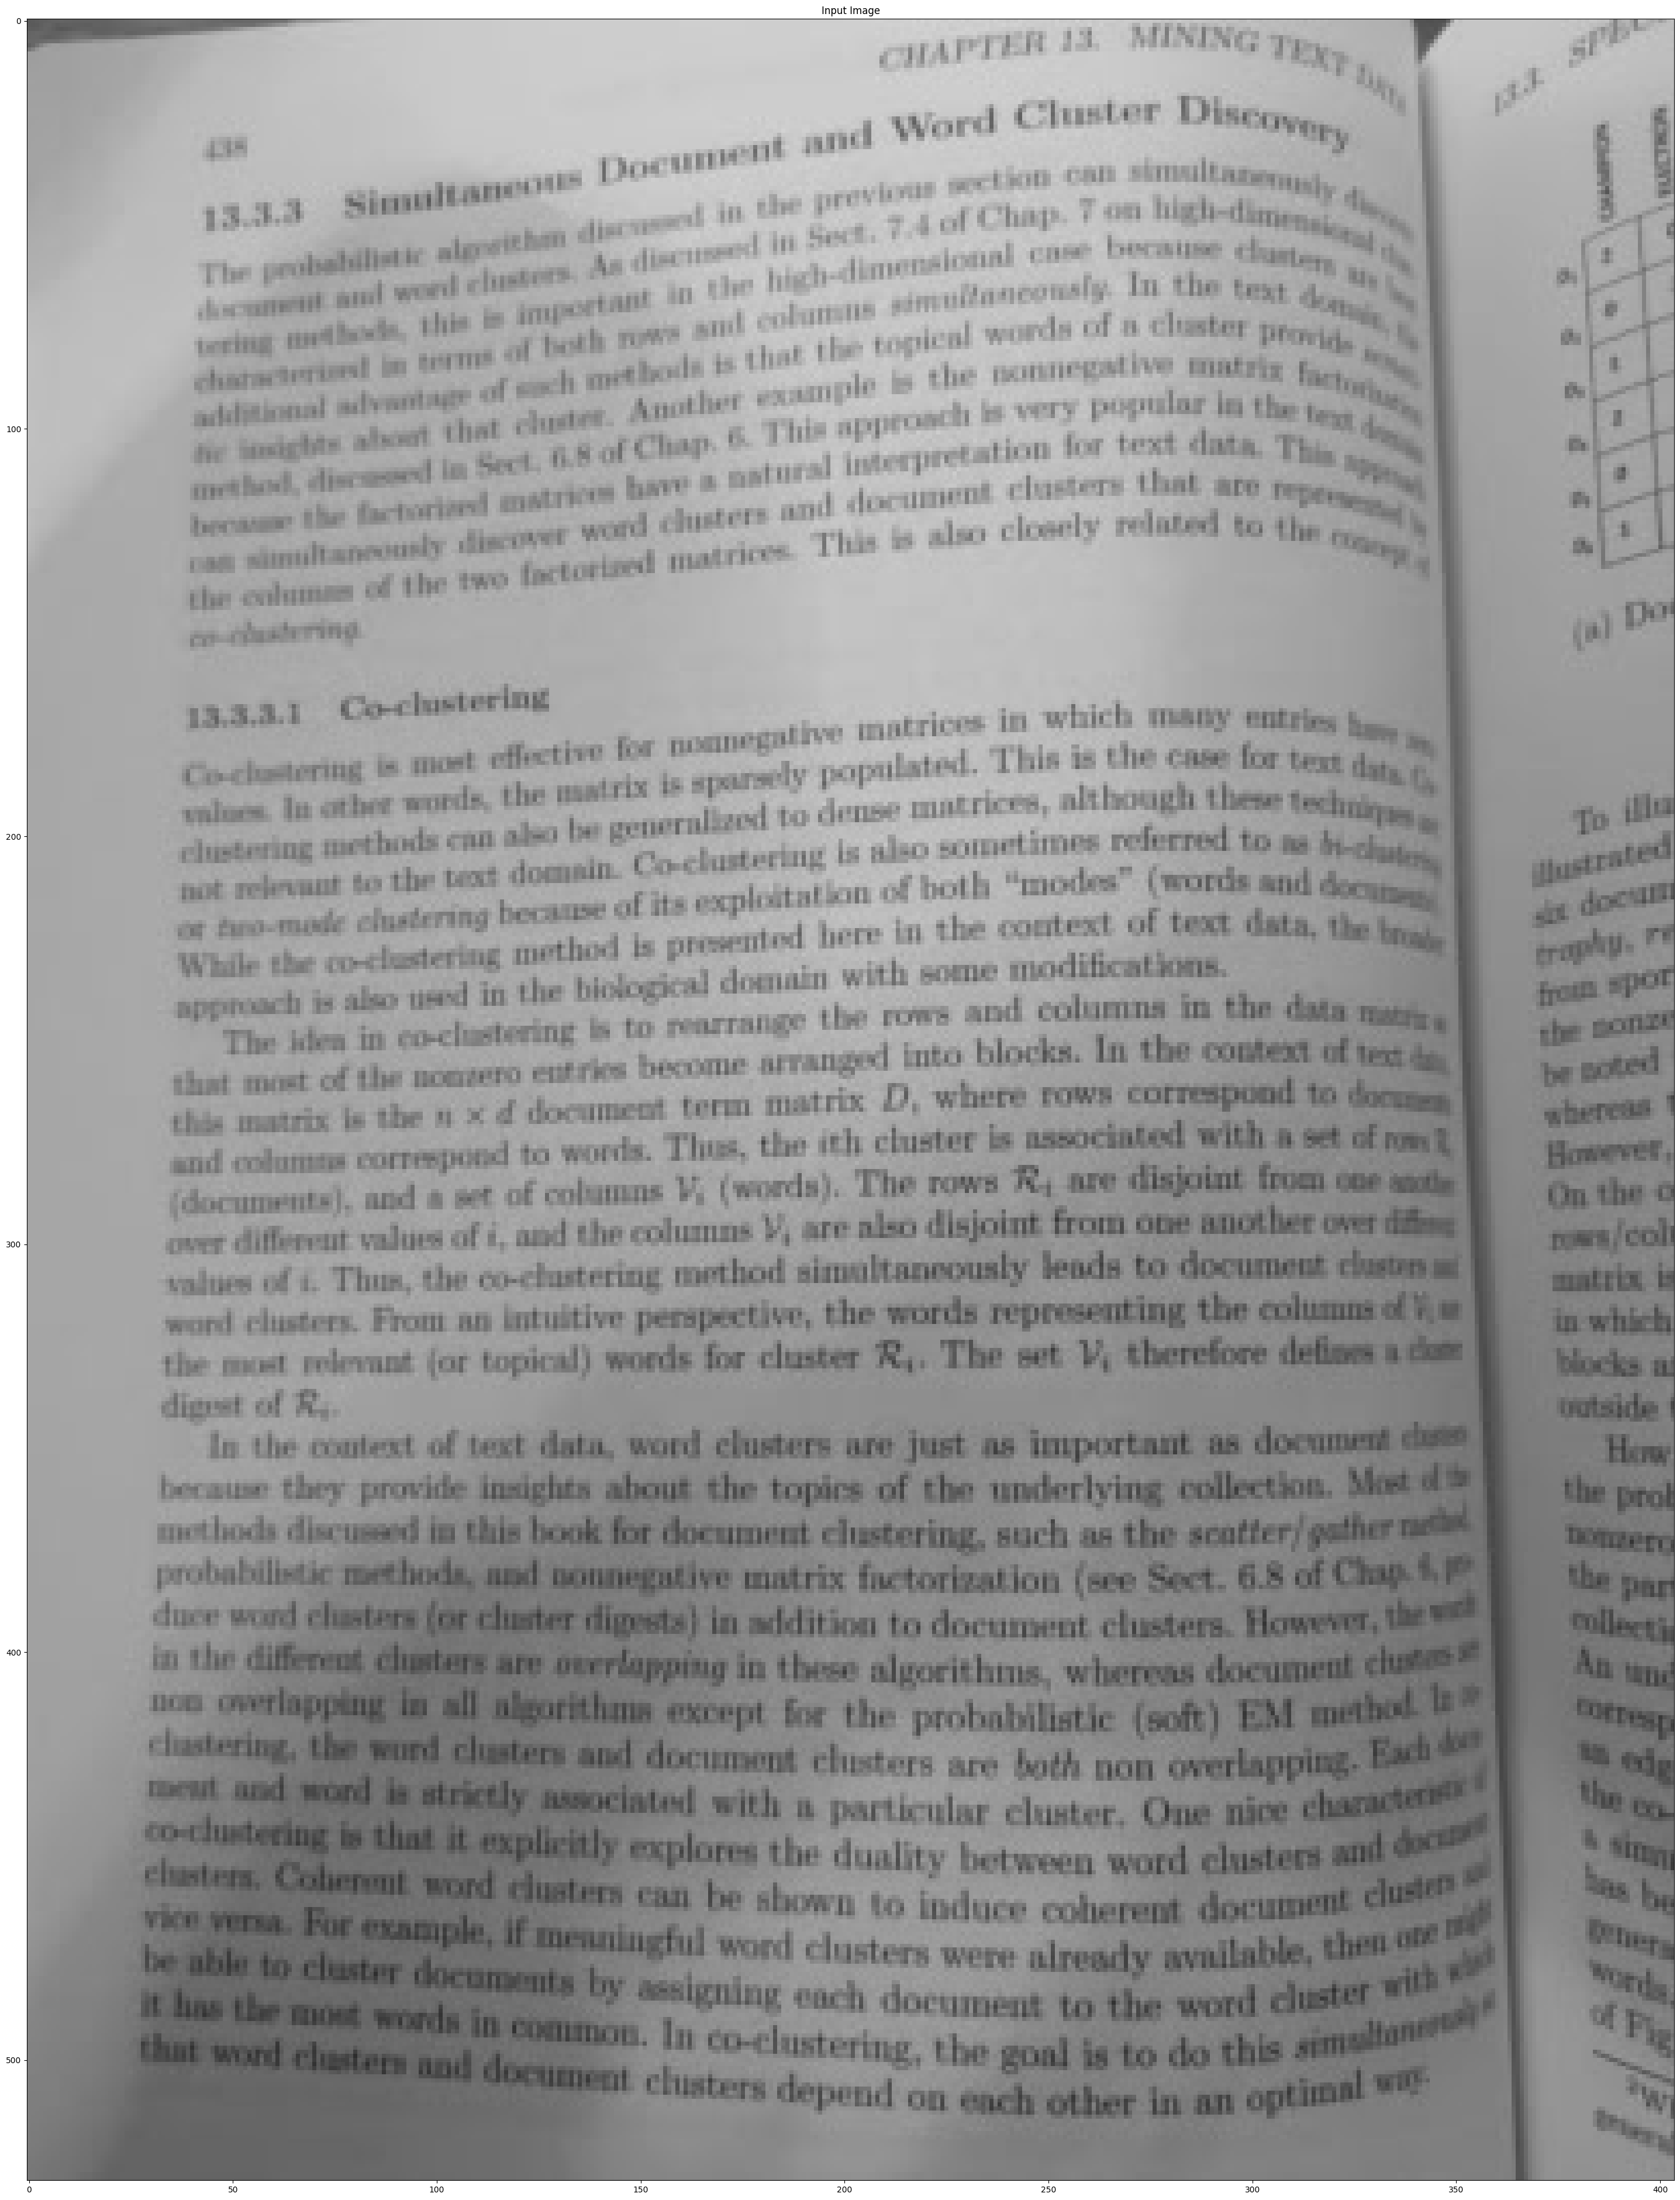

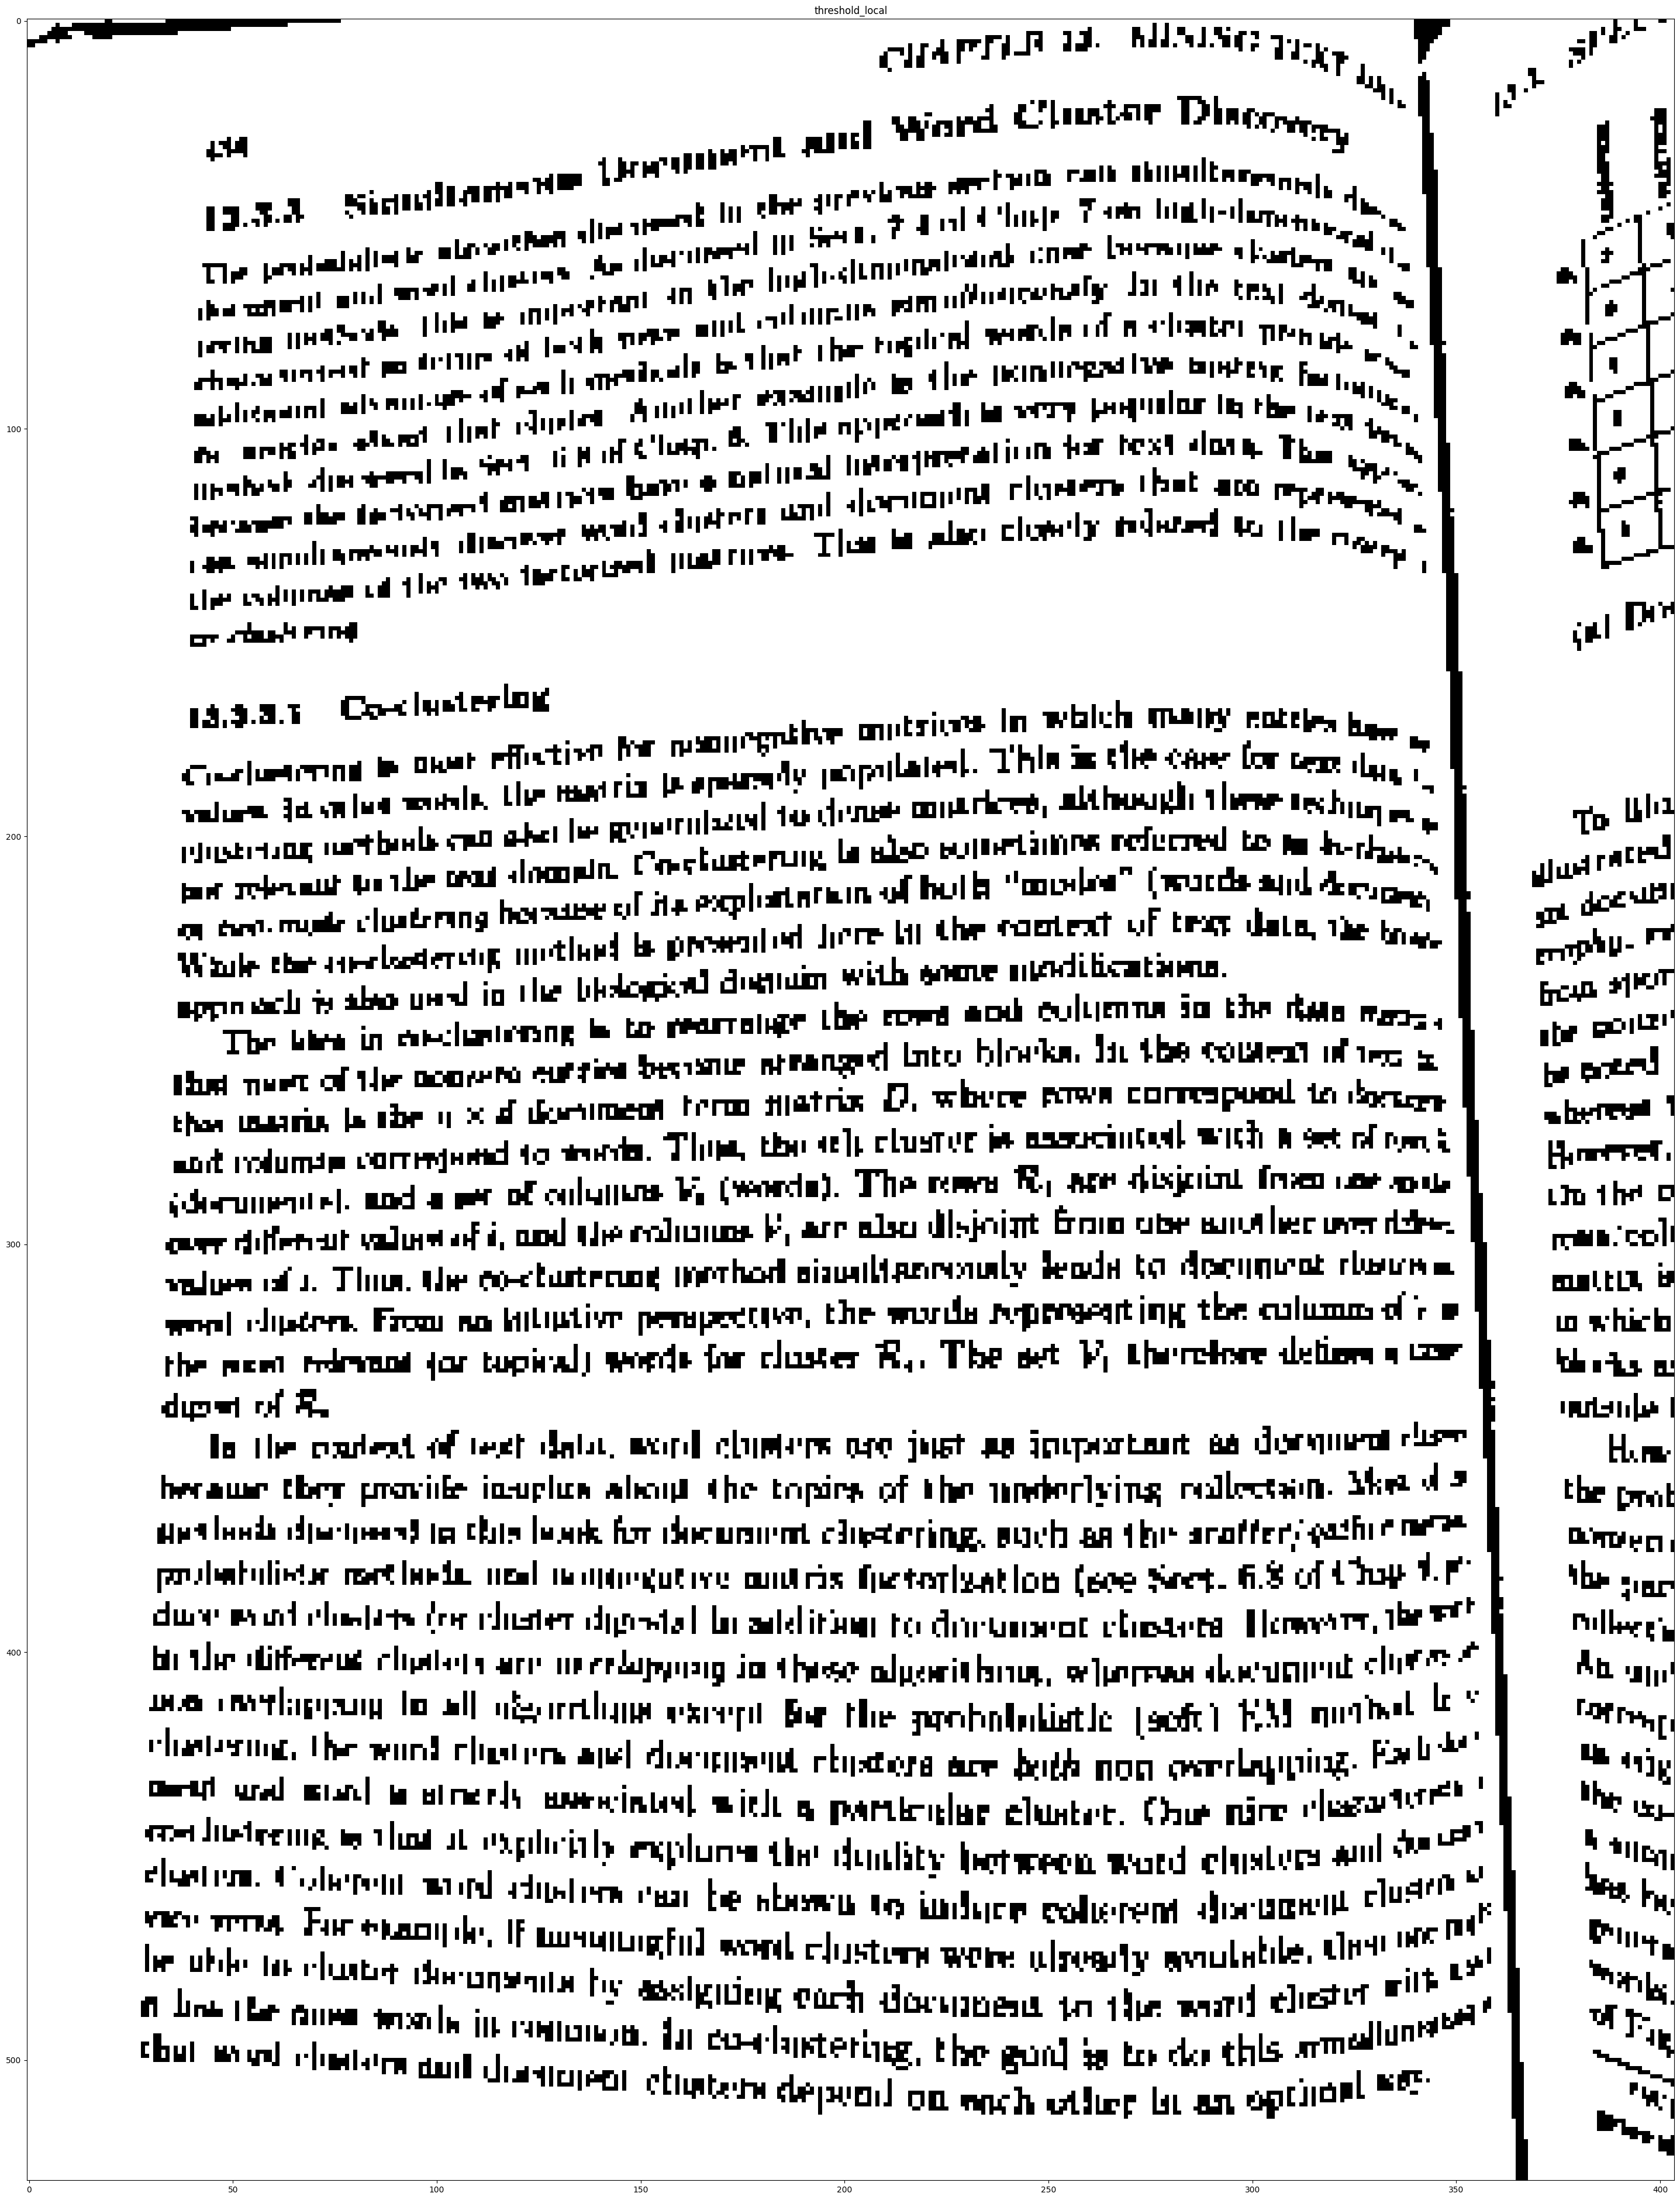

PyTesseract Extracted: ~ UATE OT

sant Ward Chante Din

      
  
  
 

     

 

  

 

 

 

     

 

 

 

 

 

. sane ea -
Stein me aod maa ae
tac is ren wee
een acy aos
er are NC cacy hind Neg
a ee ee
2 etn em min a a th
a em one atau ew schne>

eae teen mai atalino
Ie ea oe amet woke” (ms a A
Fheents manana ad cdneeh amo
Fa et pnt Sean hee wean
rach A oe ene te ore ao uO a Rene,
he sn ol cme mange ite Dv 148 CO He
a ne a? emer mar Dy mbes PWN COMA rere
a ct ant Tht ey aT aac Sh Nm fom
sm et fedane oi ee Ry eit far
seer oeeF al een Fr a it ob ural
Seer mtectanrne wrod salient fev eve
eT te Pn atte ppt te mde open ela»
Tne na fo ta) wth tr Ry, Te a By Habe de «7
doaak
Ide et a
Deca ey pei tens Ae tr of he nndersng ren Shed?

Telia trae Selig doa em 2
{bu el intra ct ee en he ga i do he ele
Hasta citer dec wach tbc a an opt08

 

ones oe it 8 Svporane aa dovone rw

 

 

 



In [ ]:
from skimage.filters import threshold_local

image = cv2.imread('scan.jpeg')
imshow("Input Image", image, size = 48)

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

### **Thresholding Helps A lot**

Typically a good preprocessing pipeline for OCR recognition will contain some or more of the following processes:
1. Bluring
2. Thresholding
3. Deskewing
4. Dilation/Erosion/Opening/Closing
5. Noise Removal

### **Let's Draw Over Regions Recognized by PyTesseract**

In [ ]:
# Get our new test image
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg

--2024-11-20 04:49:00--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2024-11-20 04:49:01--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.003s  

2024-11-20 04:49:01 (32.1 MB/s) - ‘Receipt-woolworth.jpg’ s

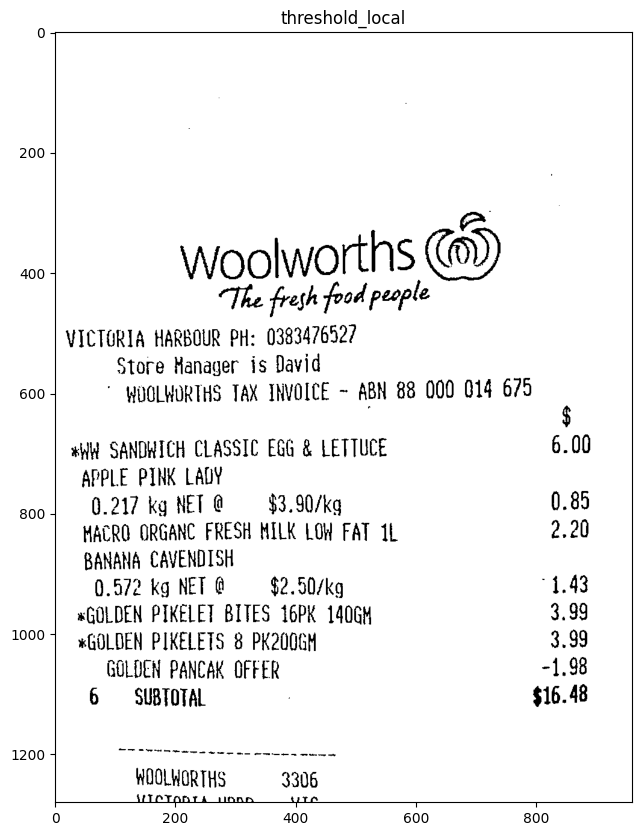

PyTesseract Extracted: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
G.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2OOGH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ANT A DIAnR



In [ ]:
from skimage.filters import threshold_local

image = cv2.imread('Receipt-woolworth.jpg')

# We get the Value component from the HSV color space
# then we apply adaptive thresholdingto
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

In [ ]:
from pytesseract import Output

d = pytesseract.image_to_data(thresh, output_type = Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Using this dictionary, we can get each word detected, their bounding box information, the text in them and the confidence scores for each.


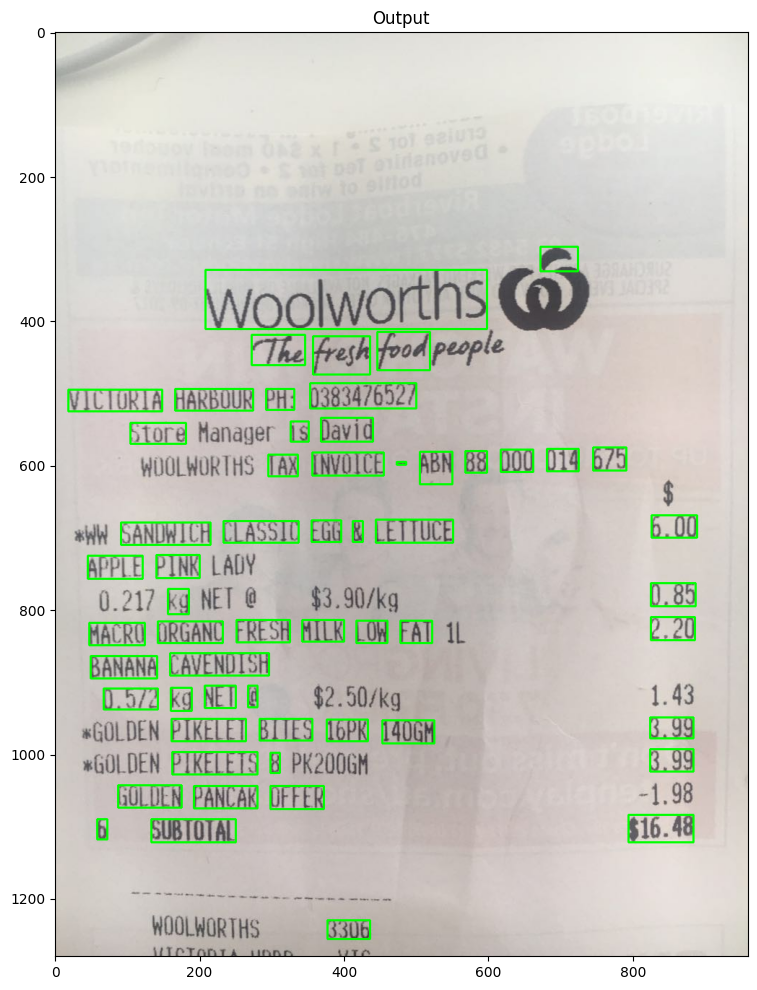

In [ ]:
n_boxes = len(d['text'])

for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow('Output', image, size = 12)


## **EASY OCR**

In [ ]:
!pip install easyocr
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 21.9 MB/s eta 0:00:00
--2024-11-20 04:54:58--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg [following]
--2024-11-20 04:54:58--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.git

### **Install older OpenCV (EasyOCR is not compatible with the latest OpenCV here in Colab)**

In [ ]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.11.41, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.5.5.62, 4.7.0.68, 4.8.0.74
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


## **Detect Text in Image and Show our Input Image**

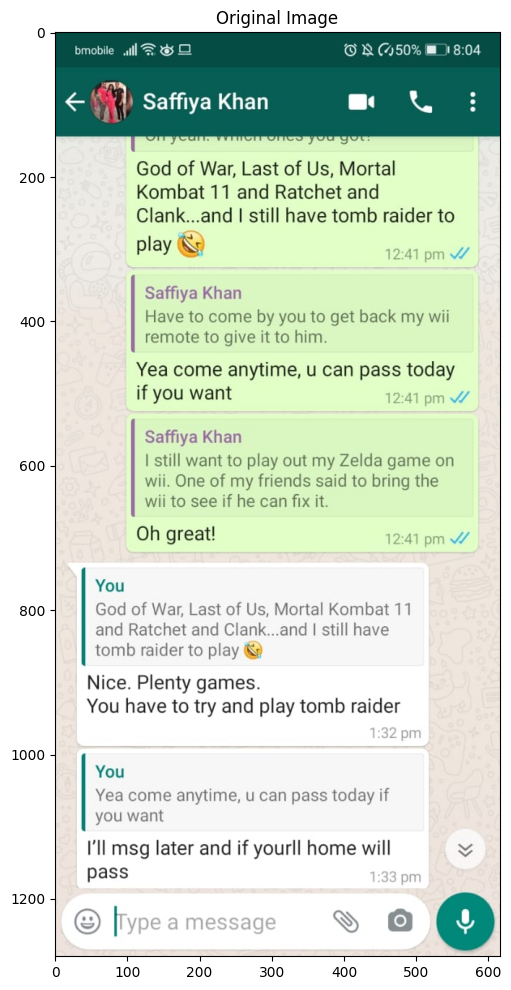

Detecting and OCR'ing text from input image...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteCompleted in 18.143396615982056 seconds


In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
from easyocr import Reader
import pandas as pd
import cv2
import time

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# load the input image from disk
image = cv2.imread("whatsapp_conv.jpeg")
imshow("Original Image", image, size = 12)

# OCR the input image using EasyOCR
print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = False)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')

In [ ]:
results

[([[24, 12], [192, 12], [192, 38], [24, 38]],
  'bmobile _ill < 82',
  0.12457802840124284),
 ([[396, 12], [510, 12], [510, 38], [396, 38]],
  '"\'0 ^ (50%',
  0.3369437989007717),
 ([[546, 12], [594, 12], [594, 36], [546, 36]], '8.04', 0.9920759797096252),
 ([[114, 74], [302, 74], [302, 122], [114, 122]],
  'Saffiya Khan',
  0.7756983803537445),
 ([[110, 174], [200, 174], [200, 204], [110, 204]],
  'God of',
  0.9911833572848934),
 ([[254, 173], [476, 173], [476, 206], [254, 206]],
  'Last of Us, Mortal',
  0.908146954391923),
 ([[110, 206], [454, 206], [454, 238], [110, 238]],
  'Kombat 11 and Ratchet and',
  0.859354745826267),
 ([[110, 240], [250, 240], [250, 270], [110, 270]],
  'Clank__and',
  0.7085109262712401),
 ([[264, 238], [558, 238], [558, 270], [264, 270]],
  'still have tomb raider to',
  0.9720005937874658),
 ([[107, 279], [167, 279], [167, 315], [107, 315]],
  'play',
  0.8657418620480265),
 ([[452, 294], [544, 294], [544, 322], [452, 322]],
  '12.41 pm',
  0.984380966

## **Display Text Overlaid onto our Image**

 Probability of Text: 12.458% OCR'd Text: bmobile _ill < 82
 Probability of Text: 33.694% OCR'd Text: "'0 ^ (50%
 Probability of Text: 99.208% OCR'd Text: 8.04
 Probability of Text: 77.570% OCR'd Text: Saffiya Khan
 Probability of Text: 99.118% OCR'd Text: God of
 Probability of Text: 90.815% OCR'd Text: Last of Us, Mortal
 Probability of Text: 85.935% OCR'd Text: Kombat 11 and Ratchet and
 Probability of Text: 70.851% OCR'd Text: Clank__and
 Probability of Text: 97.200% OCR'd Text: still have tomb raider to
 Probability of Text: 86.574% OCR'd Text: play
 Probability of Text: 98.438% OCR'd Text: 12.41 pm
 Probability of Text: 99.971% OCR'd Text: Saffiya Khan
 Probability of Text: 58.658% OCR'd Text: Have to come by you to get back my wii
 Probability of Text: 55.833% OCR'd Text: remote to give it to him:
 Probability of Text: 77.152% OCR'd Text: Yea come anytime, U can pass today
 Probability of Text: 69.669% OCR'd Text: if you want
 Probability of Text: 72.726% OCR'd Text: 12.41 pm
 P

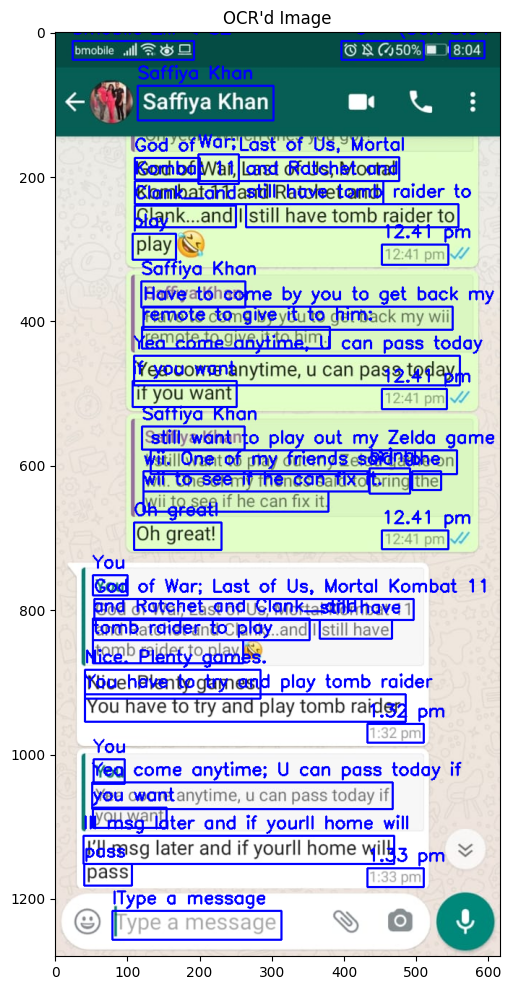

In [ ]:
all_text = []

# iterate over our extracted text
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow("OCR'd Image", image, size = 12)

## **Run on our WoolWorth Reciept**

Progress: |██████████████████████████████████████████████████| 100.0% Complete[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0220: 900
[INFO] 0.9169: Woolworths
[INFO] 0.2355: The fregh food
[INFO] 0.6125: VICIURIA HARBOUR PH:  0383476527
[INFO] 0.7185: Store Hanager
[INFO] 0.6325: i$ ٥avid
[INFO] 0.3334: WUULWURIHS TAX INVOICE
[INFO] 0.6725: ABN 88 000 014 675
[INFO] 0.9711: $
[INFO] 0.1758: *Ah SANDHICH CLASSIC EGG & LETIUCE
[INFO] 0.8745: 6. 00
[INFO] 0.6453: AFPLE PINK LALV
[INFO] 0.2459: 0. 217 kg N٤٢
[INFO] 0.9519: $3. 90/k9
[INFO] 0.7346: 0. 85
[INFO] 0.4177: HACRO ORGANC FRESH HILK LOW FAT 1l
[INFO] 0.5283: 2. 20
[INFO] 0.8945: BANANA CAVENDISH
[INFO] 0.2964: 0. 572 k ٤٢
[INFO] 0.3659: 0
[INFO] 0.9980: $2
[INFO] 0.9854: 1. 43
[INFO] 0.5516: *GULDEN PIKELEI BIES 16PK 14OGH
[INFO] 0.9248: 3. 99
[INFO] 0.3364: »GOLIEN PIKELETS 8 PKZUUIH
[INFO] 0.9786: 3. 99
[INFO] 0.3624: fULILN PANCAK OFFER
[INFO] 0.4808: -1. 98
[INFO] 0.4640: ٥
[INFO] 0.3228: SUBTUTAL
[INFO] 0.9978: $1

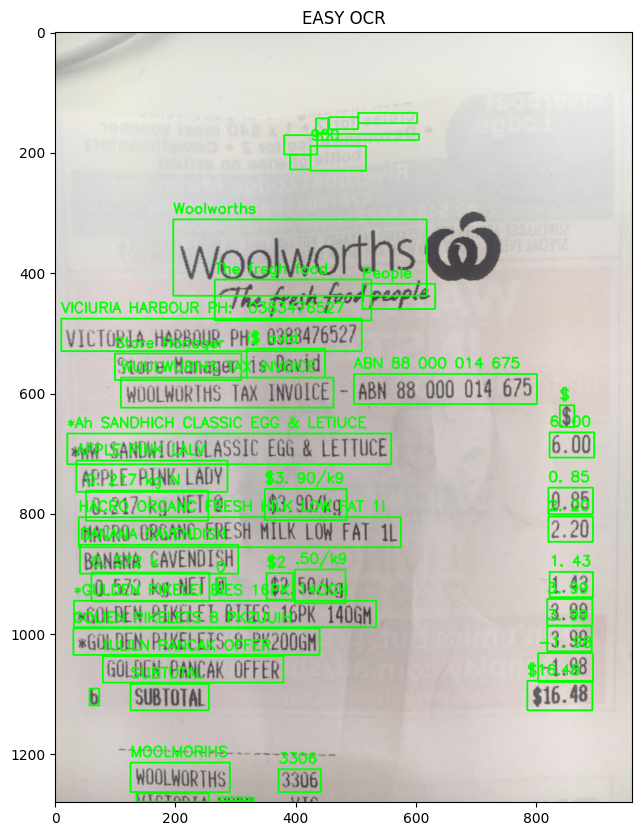

EASY OCR Extracted: .50/k9


In [ ]:
import cv2
from easyocr import Reader
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

def clean_text(text):
	# remove non-ASCII text so we can draw the text on the image
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

image = cv2.imread('Receipt-woolworth.jpg')

reader = Reader(["en","ar"], gpu=False)
results = reader.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# clean text and draw the box surrounding the text along
	text = clean_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Apply the threshold operation
#thresh = (V > T).astype("uint8") * 255
imshow("EASY OCR", image)
print("EASY OCR Extracted: {}".format(text))